In [8]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


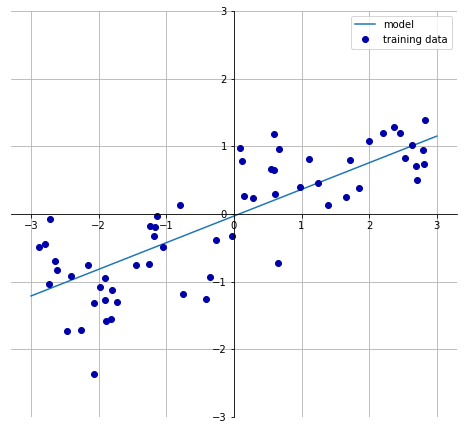

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [10]:
# 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차 mean squared error를 최소화하는 파라미터 w, y를 찾아야 한다.
# 선형 회귀 모델을 만드는 코드 (선형 회귀는 매개변수가 없는 것이 장점)
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [13]:
# 기울기 파라미터(w)는 가중치weight 또는 계수coefficient라고 하고 lr에서는 coef
print("lr.coef_: {}".format(lr.coef_))

# 편향offset 또는 절편 파라미터intercept (b)는 lr에서는 intercept_
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [16]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.67
test set score: 0.66


In [19]:
# 보스턴 주택가격 데이터셋을 통해 주택 가격 예측하기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 트레이닝 세트와 테스트 세트에 대한 점수 차이가 많이 남 -> 오버피팅 되었다!!!
# 오버피팅을 유발하는 복잡도를 제어할 수 있는 모델이 필요 -> 릿지 회귀 (ridge regression)

train set score: 0.95
test set score: 0.61


In [29]:
# 릿지 회귀를 통해 보스턴 주택가격 예측 모델 생성
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)

ridge = Ridge().fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

training set score: 0.86
test set score: 0.82


In [33]:
# alpha 값을 높여서 릿지 모델에 대해 훈련 세트의 성능은 나빠지지만 일반화된 모델 만들기
X, y = mglearn.datasets.load_extended_boston()

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.77
test set score: 0.71
training set score: 0.91
test set score: 0.87


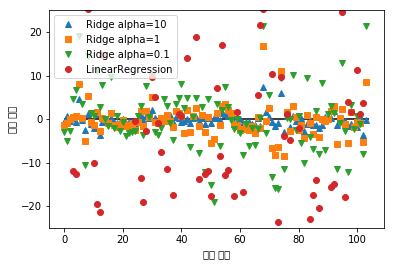

In [35]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label = "LinearRegression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()